# Part 1 : Data Cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = (r"D:\sales\Sample - Superstore.csv")
df = pd.read_csv(data, encoding="latin1")
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Total amount,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,05-04-2017,05-09-2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
df.describe()

,Row ID,Postal Code,Total amount,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Total amount', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.shape

(9994, 21)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Total amount   9994 non-null   float64
 18  Quantity

In [8]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

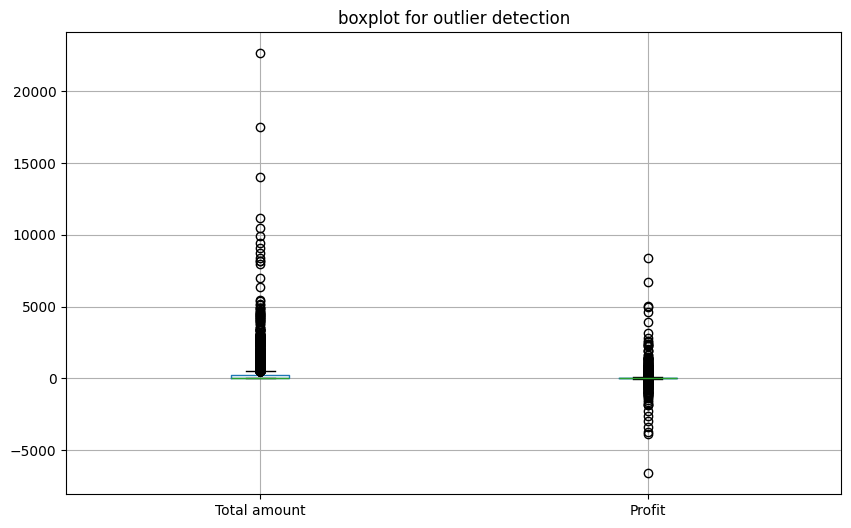

In [9]:
df[["Total amount", "Profit"]].boxplot(figsize=(10,6))
plt.title("boxplot for outlier detection")
plt.show()

In [10]:
#Convert Date column to proper datetime formate

df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed' , dayfirst=False)

In [11]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [12]:
#Here Outlier is something but according to criteria likes sales or Profit their is occur outlier becuase sales is depend people someone buy high rate product or someone buy low rate it is not major issue in data or if we remove this so it give bad impact in our prediction!

# Part 2: Data Analysis

In [13]:
Total_Revenue = df['Total amount'].sum()
print("Total Sales :", Total_Revenue)

Total Sales : 2297200.8603


In [14]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [15]:
# City-Wise and Category-Wise Sales Analysis

df.groupby(['City', 'Category'])['Total amount'].sum()

City      Category       
Aberdeen  Office Supplies      25.500
Abilene   Office Supplies       1.392
Akron     Furniture           433.596
          Office Supplies    1113.388
          Technology         1183.002
                               ...   
York      Furniture           422.058
          Office Supplies     395.920
Yucaipa   Office Supplies      50.800
Yuma      Office Supplies      55.352
          Technology          785.513
Name: Total amount, Length: 1198, dtype: float64

In [16]:
#Analyze monthly Sales trend

monthly_sales = df.groupby(['Year', 'Month'])['Total amount'].sum().reset_index()
monthly_sales

,Year,Month,Total amount
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


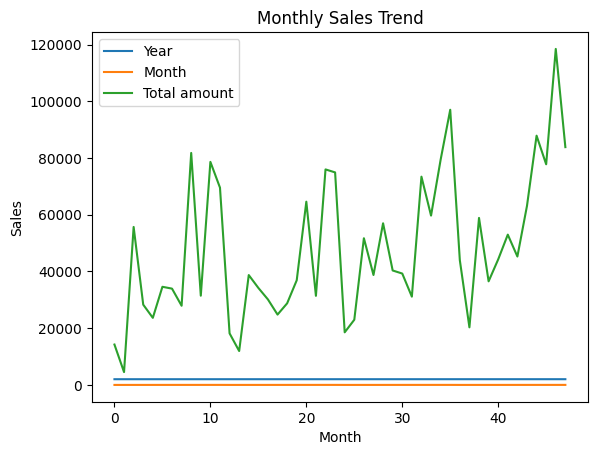

In [17]:
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

In [18]:
# Compare spending behaviour of new vs returning customers

df['Order Date'] = pd.to_datetime(df['Order Date'])

first_purchase = df.groupby('Customer ID')['Order Date'].min()
first_purchase = first_purchase.reset_index()
first_purchase.columns = ['Customer ID', 'First_Purchase_Date']

In [19]:
df = df.merge(first_purchase, on='Customer ID', how='left')

In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Total amount,Quantity,Discount,Profit,Year,Month,First_Purchase_Date
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2015-10-15
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2015-10-15
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016-06-12
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015-10-11
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015-10-11


In [21]:
df['Customer_Type'] = df['Order Date'] > df['First_Purchase_Date']
df['Customer_Type'] = df['Customer_Type'].replace({True:'Returning', False:'New'})

In [22]:
df.groupby('Customer_Type')['Total amount'].sum()

Customer_Type
New          4.002219e+05
Returning    1.896979e+06
Name: Total amount, dtype: float64

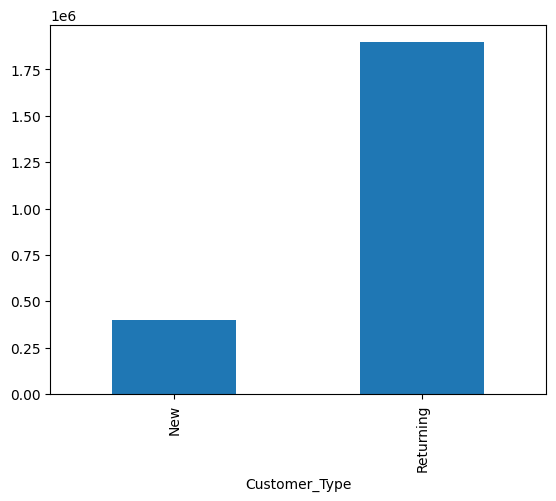

In [23]:
df.groupby('Customer_Type')['Total amount'].sum().plot(kind='bar')
plt.show()

# Part 3 : Data Visualization

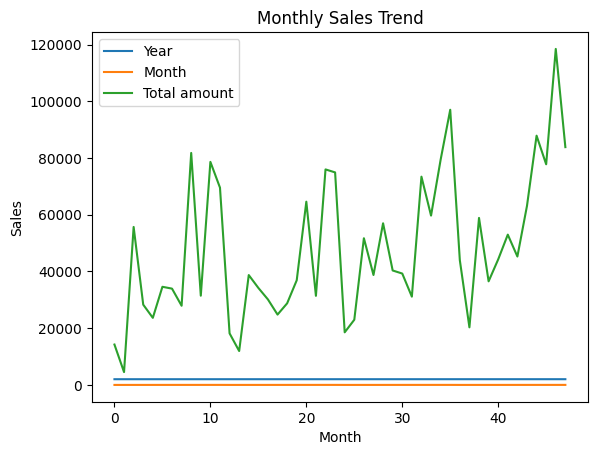

In [24]:
# Monthly Sales Trend Using Line chart
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


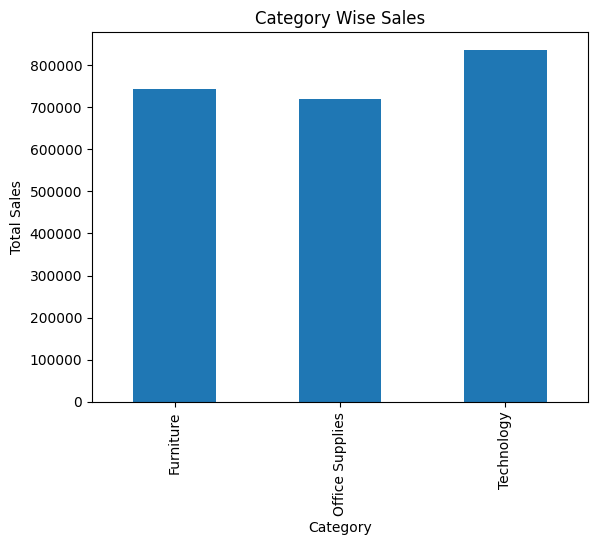

In [25]:
# Category wise Sales
Category_sales = df.groupby('Category')['Total amount'].sum()
Category_sales.plot(kind='bar')
plt.title("Category Wise Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

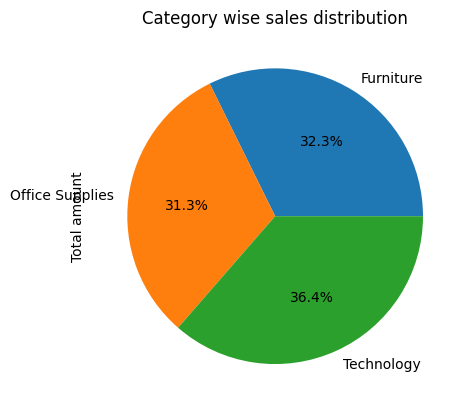

In [26]:
Category_sales.plot(kind='pie', autopct= '%1.1f%%')
plt.title("Category wise sales distribution")
plt.show()

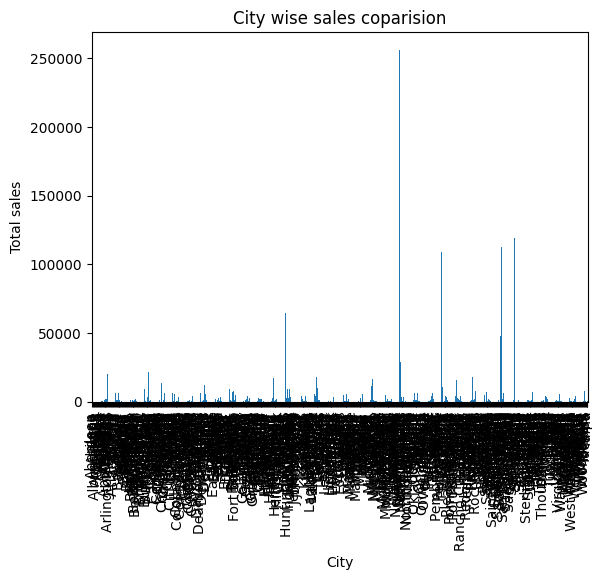

In [27]:
city_sales = df.groupby('City')['Total amount'].sum()
city_sales.plot(kind='bar',)
plt.title("City wise sales coparision")
plt.xlabel("City")
plt.ylabel("Total sales")
plt.show()

In [28]:
# top 5 best performing city

df.groupby('City')['Total amount'].sum().sort_values(ascending=False).head()

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Total amount, dtype: float64

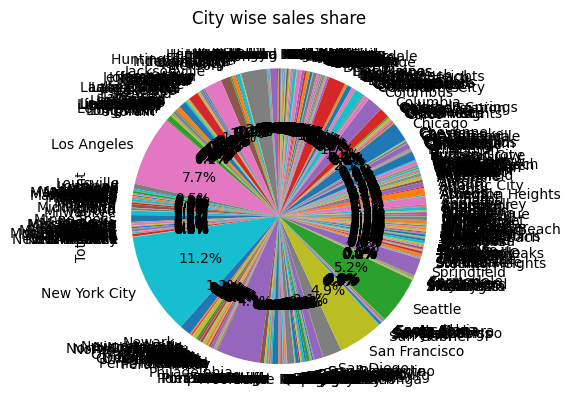

In [29]:
city_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("City wise sales share")
plt.show()

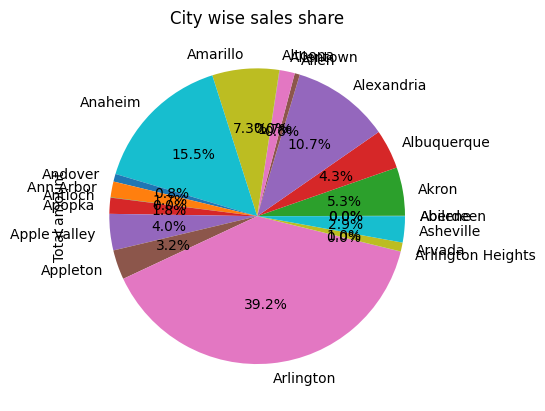

In [30]:
# top 20 cities 
city_sales[:20].plot(kind='pie', autopct='%1.1f%%')
plt.title("City wise sales share")
plt.show()

# Part 4 : Business Insights

Key insights
1. Customer Behavior Insight
Most of the customers are returning customers, which shows strong customer retention. Although new customer acquisition is slightly lower, once customers join, they tend to stay and continue purchasing.

2. Monthly Sales Trend
Monthly sales show an increasing trend, indicating positive business growth and improving performance over time.

3. Category-wise Sales Performance
There are three main categories: Furniture, Technology, and Office Supplies, out of which Technology generates the highest sales, making it the most profitable category for the business.

4. City-wise Sales Distribution
We identified the top 20 cities contributing the highest sales, which act as key revenue-generating regions for the company.

5. Improvement Area – Weak Performing Cities
Some cities have low sales performance. To improve sales in these areas, targeted marketing strategies such as discount offers, promotional campaigns, and special deals can be introduced to boost customer engagement and sales.

Mention any pattern, trends, or improvemnent areas

1. Overall Sales Performance Stable but Growth Visible

Looking at the data from 2014–2017, it's clear that the sales business is generating consistent revenue. Monthly sales mostly remain within a defined range, suggesting that the business is stable. In some months, there are sudden increases in sales, which indicate a rise in demand or promotional activity.


2. City-wise Sales Show Business Concentration

The city-wise analysis showed that some cities are major revenue contributors for the business, while others perform comparatively weakly. It's important to maintain focus on the strong cities and improve awareness/marketing in the weaker ones.

3. Strong Performing Months / Seasonality Trend

The monthly trend suggests that sales are comparatively higher in certain months, indicating seasonal demand or festival periods.
This proves that the business is not entirely random—a seasonal pattern exists.

4. Category-wise Sales Show Customer Preference

Category-wise sales reveal that some product categories are in high demand and continuously generating revenue, while others show lower performance. This provides insight into the product strategy—which categories to invest in and which ones need improvement.

5. New vs Returning Customers Behavior

Returning customers typically spend more than new customers. This means the business's base depends on loyal customers, which demonstrates customer satisfaction and trust. New customer conversion seems to be relatively low.


In [44]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

In [45]:
monthly_sales['Month_No'] = pd.to_datetime(monthly_sales['Month']).dt.month

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
x = monthly_sales[['Month_No']]
y = monthly_sales['Total amount']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)  

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [49]:
y_predict = model.predict(x_test)

In [50]:
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print("R2 score:", r2)
print("Mean Square Error:", mse)

R2 score: 0.4386722652155831
Mean Square Error: 123691426.26269002


In [51]:
result = pd.DataFrame({
    "Actual Sales" : y_test.values,
    "predicted Sales": y_predict
})
result.head(10)

,Actual Sales,predicted Sales
0,38750.0390,34478.722512
1,44261.1102,39839.204813
2,51715.8750,29118.240211
3,63120.8880,55920.651717
4,18542.4910,18397.275609
5,20301.1334,23757.757910
6,18174.0756,18397.275609
7,36898.3322,55920.651717
8,23648.2870,39839.204813
9,22978.8150,23757.757910


In [53]:
next_month = pd.DataFrame({'Month_No':[monthly_sales['Month_No'].max() + 1]})
future_prediction = model.predict(next_month)

print("Next Month Predicted Sales:", future_prediction[0])

Next Month Predicted Sales: 82723.06322247634
